In [4]:
%matplotlib inline

In [36]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import seaborn as sns
import pandas as pd
import math
from scipy.special import factorial, comb
from scipy.stats import rv_continuous

from tqdm.autonotebook import trange

In [6]:
sns.set_theme(
    context='paper', 
    palette='colorblind',
    style='whitegrid',
    rc={'text.usetex':True, 'mathtext.fontset':'cm'},
)

# Expected Number of Collisions (Parallel Connections)

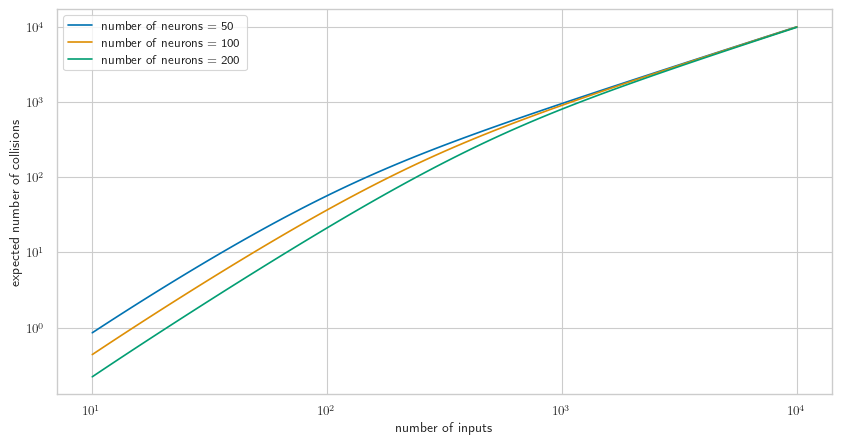

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

def expected_num_collisions(num_inputs, num_neurons):
    return num_inputs + num_neurons * (np.power((num_neurons - 1)/num_neurons, num_inputs) - 1)

num_inputs = np.logspace(1, 4, 75)
for i, num_neurons in enumerate([50, 100, 200]):
    ax.loglog(num_inputs, expected_num_collisions(num_inputs, num_neurons), color=f"C{i}", label=f"number of neurons = {num_neurons}")

ax.set_xlabel("number of inputs")
ax.set_ylabel("expected number of collisions")
ax.legend()

plt.show()

# Probability That No $M$ Parallel Connections

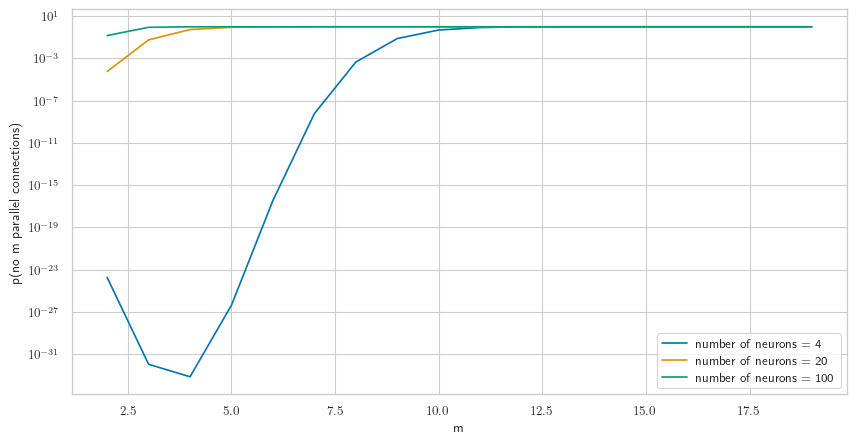

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

def probability(num_inputs, num_neurons, num_parallel_connections):
    # todo: analyse border cases...
    return np.power(1-np.power(1/num_neurons, num_parallel_connections-1), comb(num_inputs, num_parallel_connections)) 

num_inputs = 20

num_parallel_connections = np.arange(2, num_inputs)
for i, num_neurons in enumerate([4, 20, 100]):
    ax.semilogy(num_parallel_connections, probability(num_inputs, num_neurons, num_parallel_connections), color=f"C{i}", label=f"number of neurons = {num_neurons}")

ax.set_xlabel("m")
ax.set_ylabel("p(no m parallel connections)")
ax.legend()

plt.show()

No need for a large range of delays, as the maximum number of parallel connections is quite small!